# Import Data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
from collections import Counter
df_ecommerce = pd.read_csv('Ecommerce.csv',encoding='latin1')
print(df_ecommerce.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB
None


# Clean The Data
1. Remove canceled Items, Items with invoice number starting with "C"
2. Remove Items with invoice number starting with "A"
3. Remove negative or null from quantity
4. Delete column 8
5. Remove 'BANK CHARGES','C2','DOT','M','PADS','POST'
6. Remove Bad Descriptions
7. Remove null customer ID's


In [2]:
## 1. Remove cancelled items
df_ecommerce=df_ecommerce[~df_ecommerce.InvoiceNo.str.startswith("C")]


# 2. Remove Starting with A
df_ecommerce=df_ecommerce[~df_ecommerce.InvoiceNo.str.startswith("A")]
df_ecommerce.sort_values(by=['InvoiceNo'], inplace=True, ascending=False)


## 3. Remove negative or null from quantity
df_ecommerce= df_ecommerce[(df_ecommerce['UnitPrice'] > 0) | (df_ecommerce['UnitPrice'].notnull())]


## 4. Delete column 8
del df_ecommerce['Unnamed: 8']

## 5. Remove 'BANK CHARGES','C2','DOT','M','PADS','POST'
df_ecommerce=df_ecommerce[~df_ecommerce.StockCode.str.startswith("C")]
df_ecommerce=df_ecommerce[~df_ecommerce.StockCode.str.startswith("B")]
df_ecommerce=df_ecommerce[~df_ecommerce.StockCode.str.startswith("D")]
df_ecommerce=df_ecommerce[~df_ecommerce.StockCode.str.startswith("M")]
df_ecommerce=df_ecommerce[~df_ecommerce.StockCode.str.startswith("P")]

## 6. Remove Bad Descriptions
baddescriptions = "check", "check?", "?", "??", "damaged", "found", "adjustment", "Amazon", "AMAZON", "amazon adjust", "Amazon Adjustment", "amazon sales", "Found", "FOUND","found box", "Found by jackie ", "Found in w/hse", "dotcom","dotcom adjust", "allocate stock for dotcom orders ta", "FBA","Dotcomgiftshop Gift Voucher £100.00", "on cargo order","wrongly sold (22719) barcode", "wrongly marked 23343","dotcomstock", "rcvd be air temp fix for dotcom sit", "Manual","John Lewis", "had been put aside", "for online retail orders",  "taig adjust", "amazon", "incorrectly credited C550456 see 47","returned", "wrongly coded 20713", "came coded as 20713", "add stock to allocate online orders", "Adjust bad debt","alan hodge cant mamage this section", "website fixed","did  a credit  and did not tick ret", "michel oops","incorrectly credited C550456 see 47", "mailout", "test","Sale error",  "Lighthouse Trading zero invc incorr", "SAMPLES","Marked as 23343", "wrongly coded 23343","Adjustment", "rcvd be air temp fix for dotcom sit","DOTCOM POSTAGE", "POSTAGE", "Had been put aside."
df_ecommerce = df_ecommerce[~df_ecommerce.Description.isin(baddescriptions)]

## 7. Remove null customer ID's
df_ecommerce= df_ecommerce[(df_ecommerce['CustomerID'].notnull())]
df_ecommerce.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396370 entries, 541908 to 0
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396370 non-null  object 
 1   StockCode    396370 non-null  object 
 2   Description  396370 non-null  object 
 3   Quantity     396370 non-null  int64  
 4   InvoiceDate  396370 non-null  object 
 5   UnitPrice    396370 non-null  float64
 6   CustomerID   396370 non-null  float64
 7   Country      396370 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.2+ MB


# Create Amount Column: Quantity * Unit price
# Convert Invoice Date to Day, Month, and Year columns


In [3]:
## Create amount column. Quantity * Unit price
df_ecommerce['amount'] = df_ecommerce['Quantity'] * df_ecommerce['UnitPrice']

##Convert Invoice date to Day, Month, and Year columns
df_ecommerce['InvoiceDate'] = pd.to_datetime(df_ecommerce['InvoiceDate'])
df_ecommerce['Month-Year'] =df_ecommerce['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df_ecommerce['Day'] =df_ecommerce['InvoiceDate'].apply(lambda x: x.strftime('%A'))
df_ecommerce['Month'] =df_ecommerce['InvoiceDate'].apply(lambda x: x.strftime('%m'))
df_ecommerce['Year'] =df_ecommerce['InvoiceDate'].apply(lambda x: x.strftime('%Y'))
df_ecommerce.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Month-Year,Day,Month,Year
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2017-12-07,4.95,12680.00,France,14.85,2017-12,Thursday,12,2017
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2017-12-07,1.95,12680.00,France,15.60,2017-12,Thursday,12,2017
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2017-12-07,1.95,12680.00,France,23.40,2017-12,Thursday,12,2017
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2017-12-07,1.65,12680.00,France,19.80,2017-12,Thursday,12,2017
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2017-12-07,3.75,12680.00,France,15.00,2017-12,Thursday,12,2017


# What are the 20 Best Selling Products & Percent of Total Sales ?

In [4]:

## Best selling products
best_selling_prods = pd.DataFrame(df_ecommerce.groupby('Description').sum()['Quantity'])

best_selling_prods.sort_values(by=['Quantity'], inplace=True, ascending=False)

best_selling_prods['PCT']= 100 * best_selling_prods['Quantity']  / best_selling_prods['Quantity'].sum()

best_selling_prods.head(20)

,Quantity,PCT
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995,1.57
MEDIUM CERAMIC TOP STORAGE JAR,77916,1.51
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415,1.05
JUMBO BAG RED RETROSPOT,46181,0.89
WHITE HANGING HEART T-LIGHT HOLDER,36725,0.71
ASSORTED COLOUR BIRD ORNAMENT,35362,0.68
PACK OF 72 RETROSPOT CAKE CASES,33693,0.65
POPCORN HOLDER,30931,0.60
RABBIT NIGHT LIGHT,27202,0.53


## We see the top 20 in products which sold in the most quantities. 
These Items Account for over 10% of items sold
There are not many overlaps in category or function. 
Three of the top 20 are Bag's. two are Jumbo and One is lunch
Two of the top twenty are cake cases


# Top 20 products by Purchase Amount 

In [5]:
## Top ten products by ‘amount’

prod_sales = pd.DataFrame(df_ecommerce.groupby('Description').sum()['amount'])

prod_sales.sort_values(by=['amount'], inplace=True, ascending=False)

prod_sales['PCT']= 100 * prod_sales['amount']  / prod_sales['amount'].sum()


top_prods = prod_sales.head(20)

top_prods


,amount,PCT
Description,,
"PAPER CRAFT , LITTLE BIRDIE",168469.60,1.92
REGENCY CAKESTAND 3 TIER,142592.95,1.63
WHITE HANGING HEART T-LIGHT HOLDER,100448.15,1.15
JUMBO BAG RED RETROSPOT,85220.78,0.97
MEDIUM CERAMIC TOP STORAGE JAR,81416.73,0.93
PARTY BUNTING,68844.33,0.79
ASSORTED COLOUR BIRD ORNAMENT,56580.34,0.65
RABBIT NIGHT LIGHT,51346.20,0.59
CHILLI LIGHTS,46286.51,0.53


## Products by purchase amount 
1. Top ten items account for near 10% of items sold
2. The top item sold is selling over 400% more than the 10th
3. Jumbo Bags account for 3 of top 20 



# Line Graph of Monthly Sales

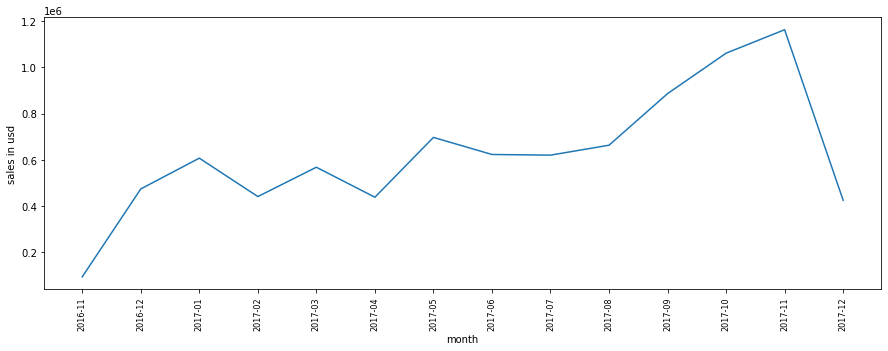

In [6]:
## Get the month _year from Order date

results= df_ecommerce.groupby('Month-Year').sum()

months=[month for month, df_ecommerce in df_ecommerce.groupby('Month-Year') ]
plt.figure (figsize=(15,5))
plt.plot(months,results['amount'])
plt.xticks(months, rotation='vertical', size=8)
plt.ylabel('sales in usd')
plt.xlabel('month')
plt.show()


## Sales line graph
1. We see three dips in monthly sales: January 2017, March 2017, May 2017
2. Sales increase dramatically at end of 3rd and 4th quarter
3. Sales were flat over summer months. 
4. This suggests some seasonality

# Which Day Of The Week has most sales?

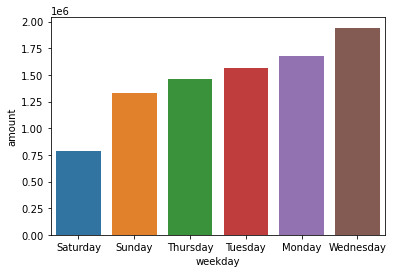

In [7]:
## weekday
df_ecommerce['weekday'] =df_ecommerce['InvoiceDate'].apply(lambda x: x.strftime('%A'))
df_ecommerce.head()
## Bar graph by weekday
resultsW= df_ecommerce.groupby('weekday').sum().sort_values('amount')
resultsW.head(7)
resultsW['weekday'] = resultsW.index
sns.barplot(x='weekday', y='amount', data=resultsW)


## Sales by day
1. Wednesday was the leading sales day
2. There were no sales on Friday
3. Saturday was the second least day
4. Sales seem to coincide with teh early part of work week


# Month over Month Sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

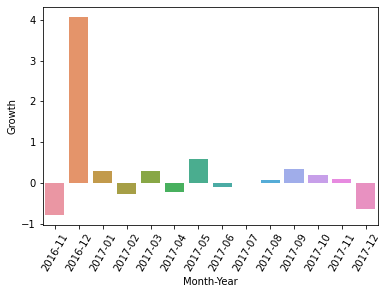

In [8]:
##Month over month

df_ecommerce['InvoiceDate'] = pd.to_datetime(df_ecommerce['InvoiceDate'])
df_ecommerce['Month-Year'] =df_ecommerce['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
MoM_Data= df_ecommerce.groupby('Month-Year').sum()

MoM_Data['Last_Month'] = np.roll(MoM_Data['amount'],1)
MoM_Data['Growth'] = (MoM_Data['amount']/MoM_Data['Last_Month'])-1


MoM_Data['Month-Year'] = MoM_Data.index
sns.barplot( x='Month-Year', y='Growth', data=MoM_Data)
plt.xticks(rotation=60)


## Sales month to Month
1. Sale increase towards holiday season


# Business performance Quarter Over Quarter 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

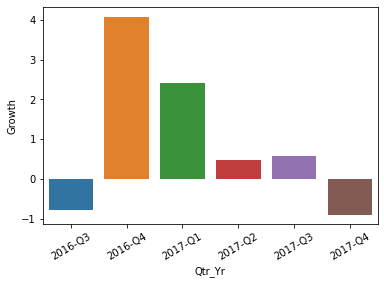

In [9]:





df_ecommerce['InvoiceDate'] = pd.to_datetime(df_ecommerce['InvoiceDate'])
df_ecommerce['Month-Year'] =df_ecommerce['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df_QoQ=df_ecommerce
df_QoQ['Qtr'] = df_QoQ['InvoiceDate'].apply(lambda x: x.strftime('%m'))

df_QoQ['Qtr'] = pd.to_numeric(df_QoQ['Qtr'])//4+1

df_QoQ['Year'] = df_QoQ['InvoiceDate'].apply(lambda x: x.strftime('%Y'))

df_QoQ['Qtr_Yr'] = df_QoQ['Year'].astype(str) + '-Q' + df_QoQ['Qtr'].astype(str)

df_QoQ.drop('Qtr', axis=1)

df_QoQ= df_QoQ.groupby('Qtr_Yr').sum()
df_QoQ['Last_Quarter'] = np.roll(df_QoQ['amount'],1)
df_QoQ['Growth'] = (df_QoQ['amount']/df_QoQ['Last_Quarter'])-1
df_QoQ.info
df_QoQ['Qtr_Yr'] = df_QoQ.index
sns.barplot( x='Qtr_Yr', y='Growth', data=df_QoQ)
plt.xticks(rotation=30)



## Quarter to Quarter 

1. Sales increased every quarter (Q4 2017 was incomplete)
2. Sales increse Q3



# Top 10 Customers and Sales Amounts , Sales Events 

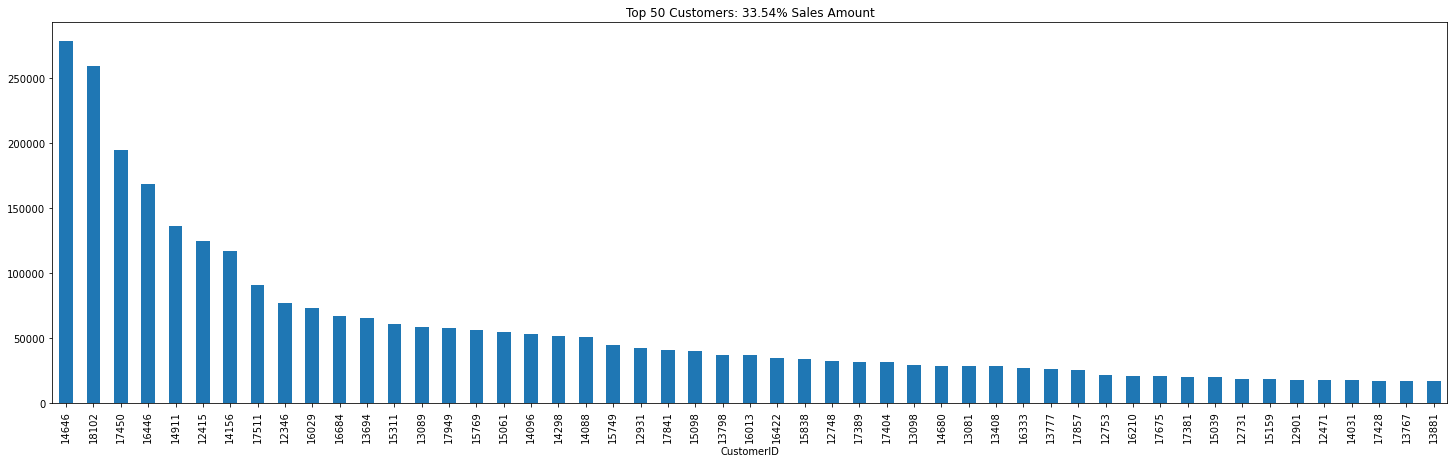

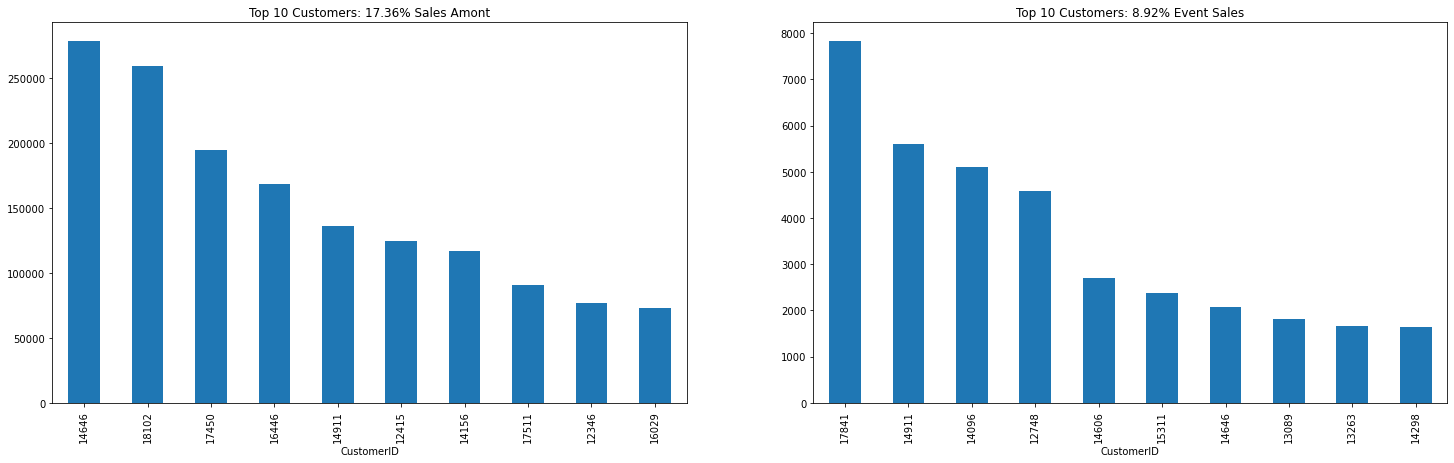

In [10]:

cs_df=df_ecommerce
cs_df.CustomerID = cs_df.CustomerID.astype('Int64')

fig = plt.figure(figsize=(25, 7))
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).amount.sum().\
                          sort_values(ascending = False)[:51].sum()/cs_df.groupby(["CustomerID"]).\
                          amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar', title='Top 50 Customers: {:3.2f}% Sales Amount'.format(PercentSales))


fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).amount.sum().\
                          sort_values(ascending = False)[:10].sum()/cs_df.groupby(["CustomerID"]).\
                          amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amont'.format(PercentSales))

f1 = fig.add_subplot(122)
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).amount.count().\
                          sort_values(ascending = False)[:10].sum()/cs_df.groupby(["CustomerID"]).\
                          amount.count().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).amount.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Sales'.format(PercentSales))



## Sales 
1. Top 50 Customer account for 31.32% of sales
2. The top 10 Customer account for 16.5% sales
3. These same 10 customers 8.9% of sales events


# List Most Sold Products & Amounts

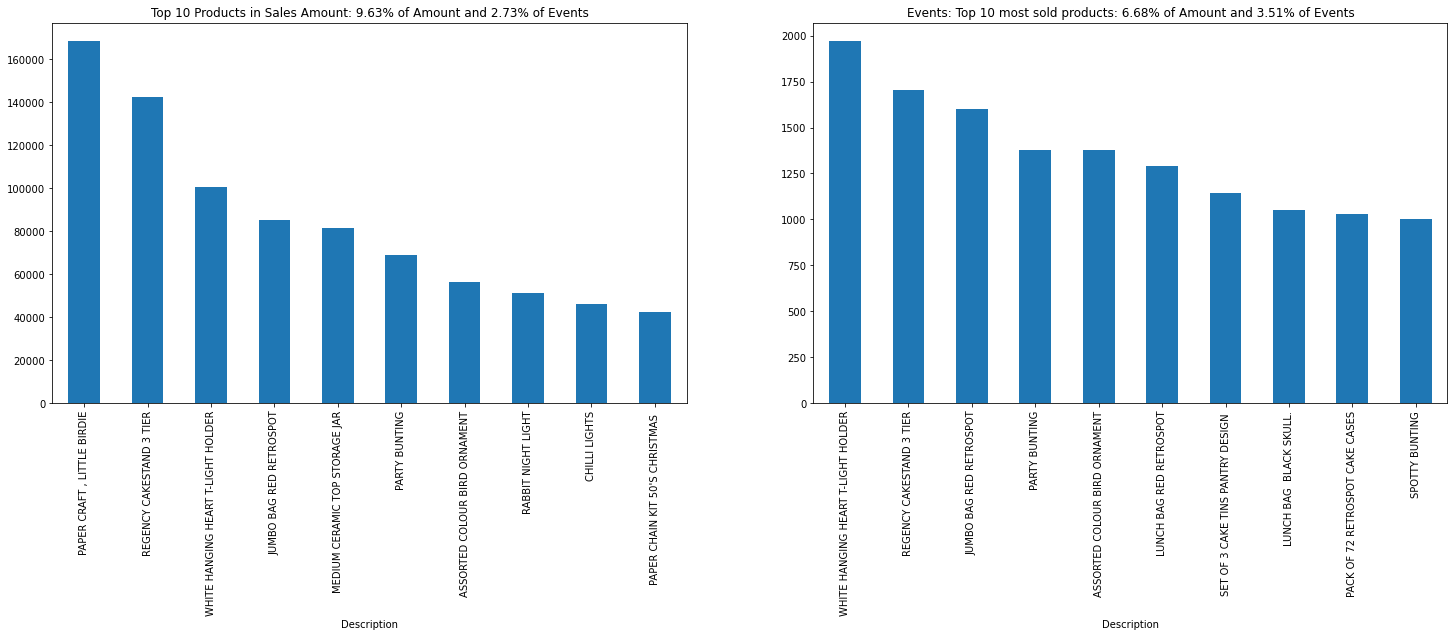

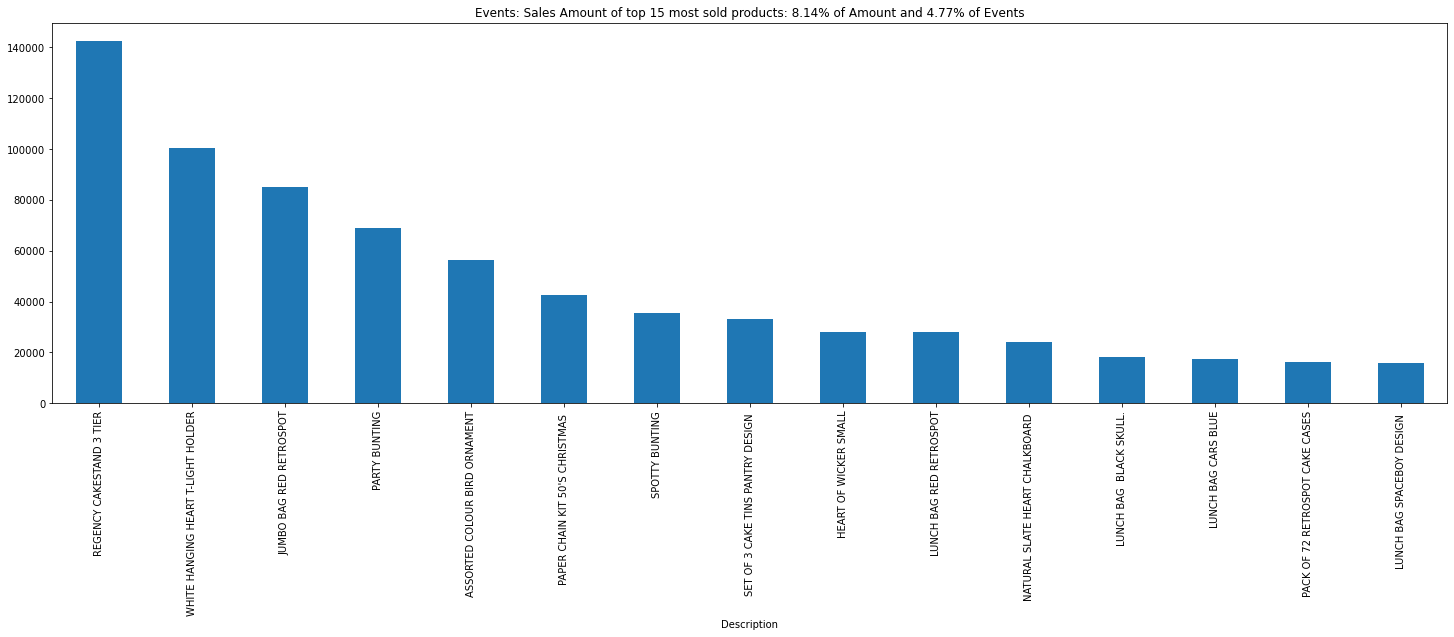

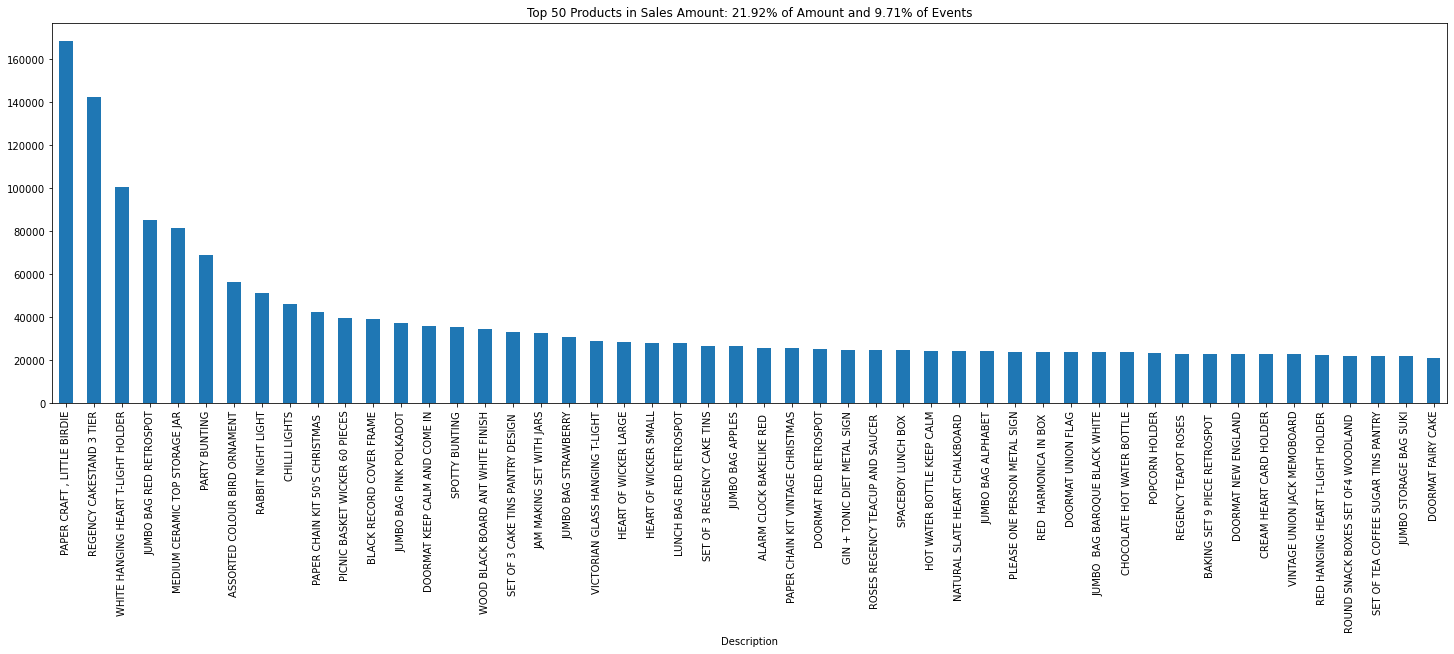

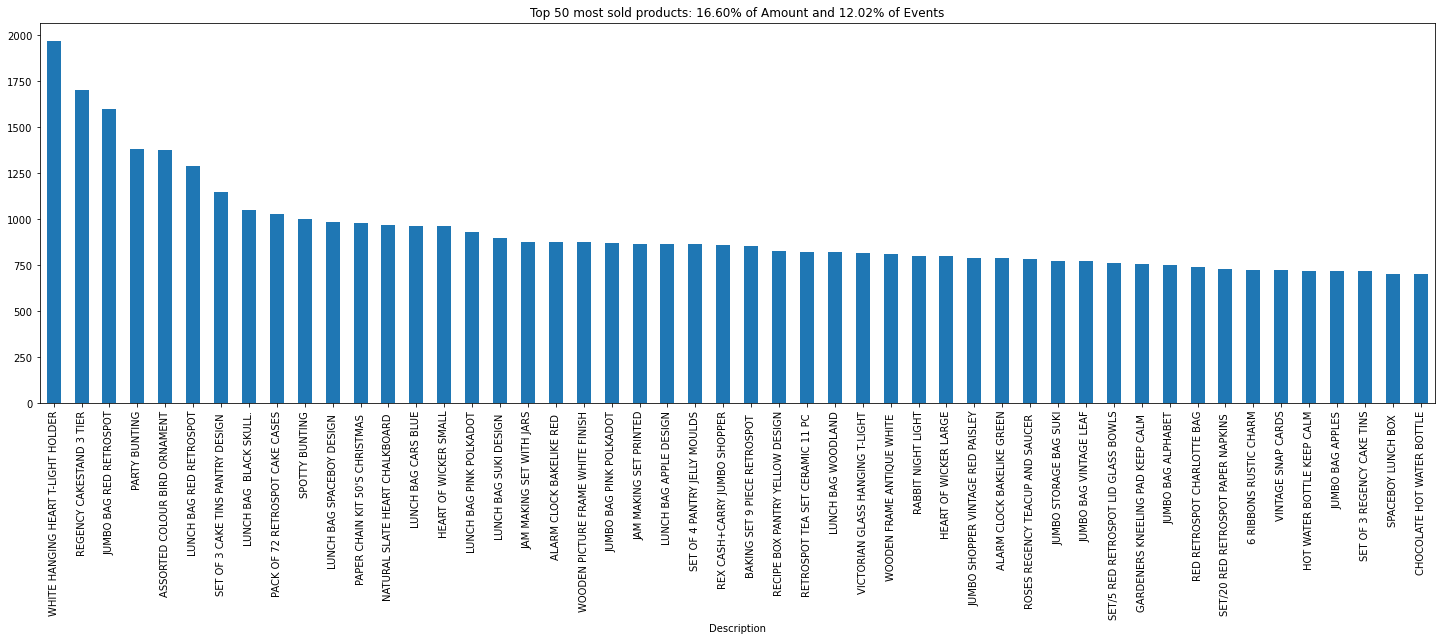

In [11]:
AmoutSum = cs_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = cs_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

#Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))

# Events: Top 10 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events
f1 = fig.add_subplot(122)
Top10Ev = list(inv[:10].index)
PercentSales =  np.round((AmoutSum[Top10Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top10Ev].\
    plot(kind='bar', title='Events: Top 10 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))


# Sales Amount of top 15 events most sold products: {:3.2f}% of Amount and {:3.2f}% of Events
fig = plt.figure(figsize=(25, 7))
Top15ev = list(inv[:15].index)
PercentSales =  np.round((AmoutSum[Top15ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top15ev].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top15ev].sort_values(ascending = False).\
    plot(kind='bar', 
         title='Events: Sales Amount of top 15 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))



#Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events
fig = plt.figure(figsize=(25, 7))
Top50 = list(AmoutSum[:50].index)
PercentSales =  np.round((AmoutSum[Top50].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top50].\
    plot(kind='bar', 
         title='Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))


#Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events
fig = plt.figure(figsize=(25, 7))
Top50Ev = list(inv[:50].index)
PercentSales =  np.round((AmoutSum[Top50Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top50Ev].\
    plot(kind='bar', title='Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))



## Sales 
1. Top Ten products Sales amount 9.63% and 2.73 of sales events
2. Top 10 most sold products acount for 6.68%  of sales 3.51% of events
3. Top 15 over 20% of amount sold and 8.14% of events
4. Top 50 22% of amount and 9.71 % events
5. Top 50 most sold products 16.6% and 12% of events

# Market Basket Sorted by Lift

In [12]:
data_plus=df_ecommerce
basket_plus = (data_plus.groupby(['InvoiceNo', 'Description'])['Quantity']
               .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket_plus
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_encode_plus = basket_plus.applymap(encode_units)
basket_encode_plus
basket_filter_plus = basket_encode_plus[(basket_encode_plus > 0).sum(axis=1) >= 2]
basket_filter_plus

from mlxtend.frequent_patterns import apriori

frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.03, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

frequent_itemsets_plus[ (frequent_itemsets_plus['length']  == 2) &
                        (frequent_itemsets_plus['support'] >= 0.03) ]
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets_plus, metric='lift', 
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.05,0.04,0.03,0.69,17.16,0.03,3.13
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.04,0.05,0.03,0.78,17.16,0.03,4.40
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.05,0.05,0.03,0.68,13.18,0.03,2.93
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.05,0.05,0.03,0.60,13.18,0.03,2.41
4,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.05,0.08,0.03,0.56,7.47,0.03,2.11
5,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.08,0.05,0.03,0.41,7.47,0.03,1.59
6,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.05,0.09,0.03,0.63,6.78,0.03,2.44
7,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.09,0.05,0.03,0.34,6.78,0.03,1.45
8,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.06,0.08,0.03,0.49,6.54,0.03,1.82
9,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.08,0.06,0.03,0.40,6.54,0.03,1.57


## Market Basket
1.There are many products which are commonly sold together. 

2.It appears that in this analysis that many are like products with different appearances

3.A more thorough study on if this is due to many resellers, or if it is common for individuals to buy like products with different appearances. 

4.Consider marketing like products with different appearances. 


# Who are the top 10 of our best customers!

RFM Score Calculations
RECENCY (R): Days since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent

In [13]:
# Most Recent Sales Date
df_ecommerce['InvoiceDate'].max()

Timestamp('2017-12-07 00:00:00')

In [14]:

import datetime as dt
NOW = dt.datetime(2017,12,7)
df_ecommerce['InvoiceDate'] = pd.to_datetime(df_ecommerce['InvoiceDate'])

# Create a RFM table
rfmTable = df_ecommerce.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'amount': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'amount': 'monetary_value'}, inplace=True)
# Split the metrics
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
# Create a segmented RFM table
segmented_rfm = rfmTable
# The lowest recency, highest frequency and monetary amounts are our best customers.
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Add segment numbers to the newly created segmented RFM table
  
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.sort_values('monetary_value', ascending=False).head(10)    


,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
14646,1,2064,279138.02,1,1,1
18102,0,431,259657.30,1,1,1
17450,8,337,194550.79,1,1,1
16446,0,3,168472.50,1,4,1
14911,1,5591,136275.72,1,1,1
12415,24,715,124564.53,2,1,1
14156,9,1387,116729.63,1,1,1
17511,2,963,91062.38,1,1,1
12346,325,1,77183.60,4,4,1


## RFM Analysis
Look at outliers in top 10 Customer ID: 16446 & 12346

In [15]:
# Add a new column to combine RFM score:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()
# Who are the top 10 of our best customers!
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
14646,1,2064,279138.02,1,1,1,111
18102,0,431,259657.30,1,1,1,111
17450,8,337,194550.79,1,1,1,111
14911,1,5591,136275.72,1,1,1,111
14156,9,1387,116729.63,1,1,1,111
17511,2,963,91062.38,1,1,1,111
16684,4,277,66653.56,1,1,1,111
13694,3,568,65039.62,1,1,1,111
15311,0,2379,60767.90,1,1,1,111


In [16]:
# Count num of unique segments
rfm_count_unique = segmented_rfm.groupby('RFMScore')['RFMScore'].nunique()
print(rfm_count_unique.sum())

61


In [17]:
rfm=segmented_rfm
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
rfm.head()


,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,RFM_Score
CustomerID,,,,,,,,
12346,325,1,77183.60,4,4,1,441,9
12347,2,182,4310.00,1,1,1,111,3
12348,75,27,1437.24,3,3,2,332,8
12349,18,72,1457.55,2,2,2,222,6
12350,310,16,294.40,4,4,4,444,12


In [18]:
# Define rfm_level function
def rfm_level(df):
    if ((df['RFM_Score'] >= 9) and (df['RFM_Score'] <11)):
        return '7th-Cold'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return '6th-Warm'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return '5th-Potential'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return '4th-Bronze'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return '3rd-Silver'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return '2nd-Gold'
    elif ((df['RFM_Score'] >= 3) and (df['RFM_Score'] < 4)):
        return '1st-All Stars'
    else:
        return '8th-Lost'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = segmented_rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean','sum', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)


              recency frequency monetary_value                 
                 mean      mean           mean        sum count
RFM_Level                                                      
1st-All Stars    6.60    376.60        9309.90 4096377.20   440
2nd-Gold        20.30    186.70        3969.00 1551894.90   391
3rd-Silver      31.80    114.30        2020.40  862700.20   427
4th-Bronze      46.00     79.90        1804.30  741578.60   411
5th-Potential   62.70     56.30         975.50  450697.90   462
6th-Warm        81.10     38.90         746.90  341334.10   457
7th-Cold       126.10     24.40         578.20  563787.60   975
8th-Lost       216.80     10.90         197.80  152696.20   772


In [19]:
segmented_rfm.sort_values('monetary_value', ascending=False).head(30)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
14646,1,2064,279138.02,1,1,1,111,3,1st-All Stars
18102,0,431,259657.30,1,1,1,111,3,1st-All Stars
17450,8,337,194550.79,1,1,1,111,3,1st-All Stars
16446,0,3,168472.50,1,4,1,141,6,4th-Bronze
14911,1,5591,136275.72,1,1,1,111,3,1st-All Stars
12415,24,715,124564.53,2,1,1,211,4,2nd-Gold
14156,9,1387,116729.63,1,1,1,111,3,1st-All Stars
17511,2,963,91062.38,1,1,1,111,3,1st-All Stars
12346,325,1,77183.60,4,4,1,441,9,7th-Cold


In [20]:
rfm=rfm.reset_index()


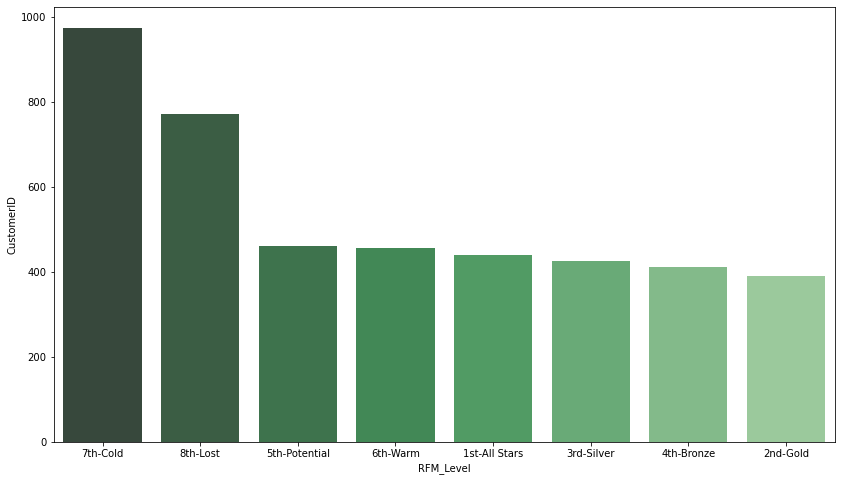

In [21]:
sq1=rfm.groupby('RFM_Level')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=sq1,x='RFM_Level', y='CustomerID', palette='Greens_d', orient=True)





## RFM Analysis
The top 4 are the most exclusive classes
Classes represent 10% of total customers
7th and 8th consist of two class groups


In [22]:
rfm_level_agg.head(10)



recency frequency monetary_value                 
                 mean      mean           mean        sum count
RFM_Level                                                      
1st-All Stars    6.60    376.60        9309.90 4096377.20   440
2nd-Gold        20.30    186.70        3969.00 1551894.90   391
3rd-Silver      31.80    114.30        2020.40  862700.20   427
4th-Bronze      46.00     79.90        1804.30  741578.60   411
5th-Potential   62.70     56.30         975.50  450697.90   462
6th-Warm        81.10     38.90         746.90  341334.10   457
7th-Cold       126.10     24.40         578.20  563787.60   975
8th-Lost       216.80     10.90         197.80  152696.20   772

## RFM Analysis 
The top tier is 3 
I combined 9,10  and 11, 12. 
Which is why there are 8 levels. 



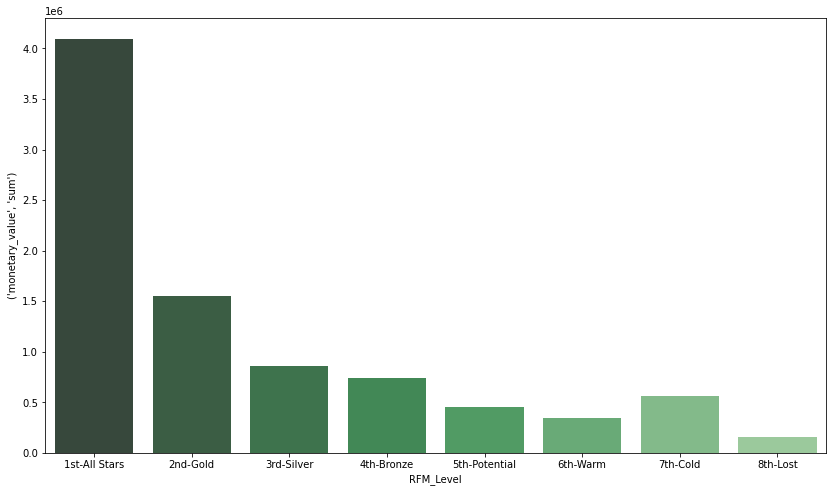

In [23]:
rfm_level_agg=rfm_level_agg.reset_index()
sq2=rfm_level_agg
plt.figure(figsize=(14,8))
sns.barplot(data=sq2,x='RFM_Level', y=('monetary_value', 'sum'), palette='Greens_d', orient=True)



## Market Basket Analysis 
The top-level accounts for near 50% of sales 
There is an outlier a one-time visitor in the 7th tear which accounts for 20% of sales in the category. 


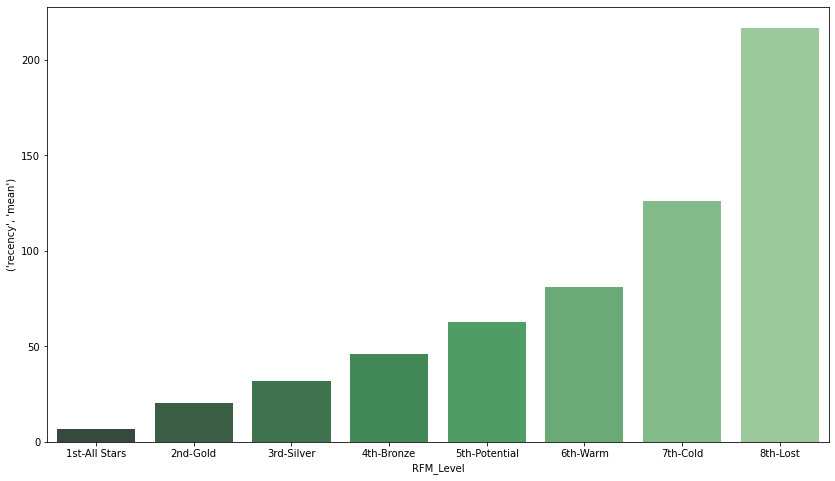

In [24]:
rfm_level_agg=rfm_level_agg.reset_index()
sq3=rfm_level_agg
plt.figure(figsize=(14,8))
sns.barplot(data=sq2,x='RFM_Level', y=('recency', 'mean'), palette='Greens_d', orient=True)



## Market Basket Analysis 

The top 3 level have purchased in past 45 days
The bottom 3 levels have not visited site in 3 month. 


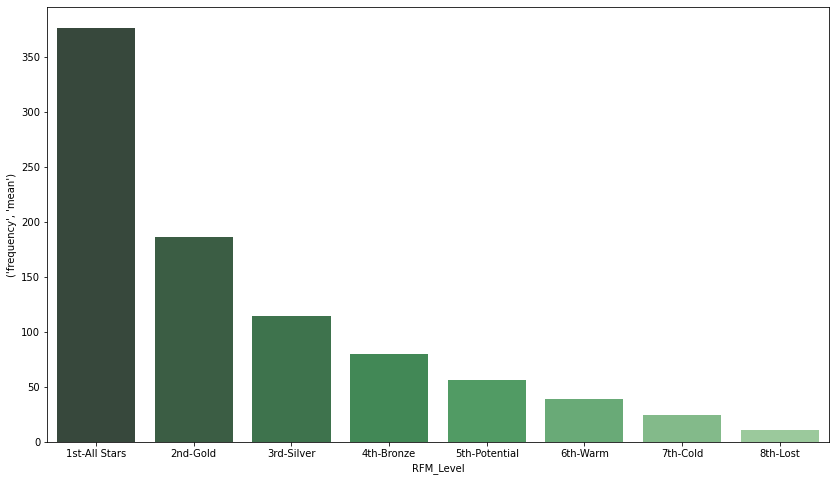

In [25]:
sq4=rfm_level_agg
plt.figure(figsize=(14,8))
sns.barplot(data=sq2,x='RFM_Level', y=('frequency', 'mean'), palette='Greens_d', orient=True,)



## Market Basket Analysis 
1. Top RFM levels visit more than 100 times in 14 months
2. The bottom three levels visited under 50 times


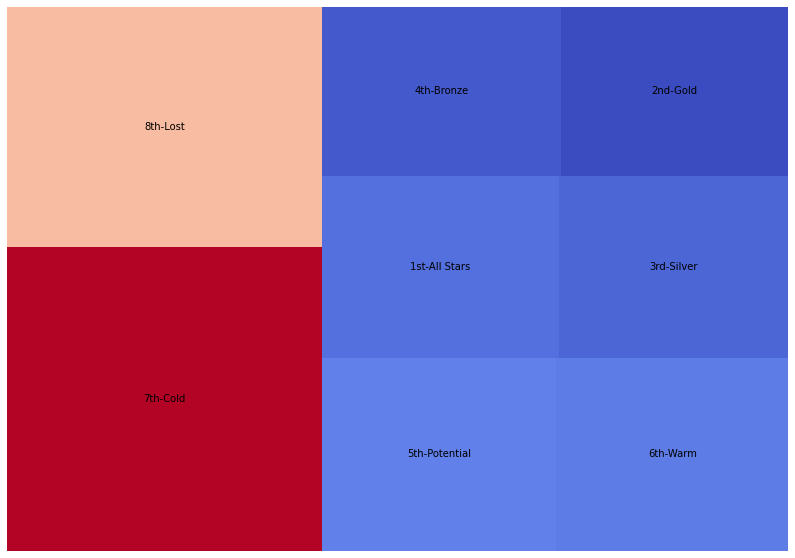

In [26]:
import squarify
import matplotlib  
cmap = matplotlib.cm.coolwarm
mini= min(sq1['CustomerID'])
maxi= max(sq1['CustomerID'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sq1['CustomerID']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14,10)
squarify.plot(sizes=sq1['CustomerID'], label=sq1.RFM_Level, alpha=1, color=colors)
plt.axis('off')
plt.show()
                                              

## Here are the top customers , Top in Frequency of sales , Monetary Value and Recency
These are done in quartiles but might be tightend up if we deciles

## Returning Customers and Purchase Frequency
Isolate to one year

In [27]:
df_1yr=df_ecommerce.groupby('InvoiceNo').agg({'CustomerID':'first', 'amount':'sum', 'InvoiceDate':'first'})
mask = (df_1yr['InvoiceDate'] > '2016-12-01') & (df_1yr['InvoiceDate'] <= '2017-11-01')
df_1yr=df_1yr.loc[mask]
df_Return=df_1yr
df_Returning=df_Return.assign(Occurence=np.where(~df_Return['CustomerID'].duplicated(),'New','Existing'))
df_Returning.groupby("Occurence")["CustomerID"].nunique()

Occurence
Existing    2421
New         3963
Name: CustomerID, dtype: int64

## Customer Lifetime

In [28]:
customer = df_ecommerce.groupby('CustomerID').agg({'InvoiceDate':lambda x: (x.max() -x.min()).days,
                                                                            'InvoiceNo': lambda x: len(x), 
                                                                            'amount' : lambda x: sum(x) })
customer.columns = ['Age', 'Frequency', 'TotalSales']


In [29]:
Average_sales = round(np.mean(customer['TotalSales']),2)
print(f'Average slaes: ${Average_sales}')
Purchase_freq= round(np.mean(customer['Frequency']),2)
print(f'Purchase freq: ${Purchase_freq}')
Retention_rate = customer[customer['Frequency']>1].shape[0]/customer.shape[0]
print(f'Retention rate: ${Retention_rate}')
churn=round(1-Retention_rate, 2)
print(f'Churn: {churn}%')
# Calculating the clv
Profit_margin = 0.05
CLV=round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
print(f'The customer Lifetime Value (CLV) for each customer is ${CLV}')
                          

Average slaes: $2021.01
Purchase freq: $91.43
Retention rate: $0.9829296424452134
Churn: 0.02%
The customer Lifetime Value (CLV) for each customer is $461952.36


In [30]:
customer['TotalSales'].describe()

count     4335.00
mean      2021.01
std       8906.53
min          0.00
25%        305.41
50%        668.11
75%       1631.48
max     279138.02
Name: TotalSales, dtype: float64

In [31]:
# Transform to customer level
customer_cohort = df_ecommerce.groupby('CustomerID').agg({'InvoiceDate':lambda x: x.min().month,
                                                                            'InvoiceNo': lambda x: len(x), 
                                                                            'amount' : lambda x: sum(x) })
customer_cohort.columns = ['Start_Month', 'Frequency', 'TotalSales']




In [32]:
# Calculating CLV for each Cohort
months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
Monthly_CLV = []
         
for i in range(1, 13):
         customer_m = customer_cohort[customer_cohort['Start_Month']==i]
         
         Average_sales = round(np.mean(customer_m['TotalSales']),2)
         
         Purchase_freq = round(np.mean(customer_m['Frequency']),2)
         
         Retention_rate = customer_m[customer_m['Frequency']>1].shape[0]/customer.shape[0]
         churn=round(1-Retention_rate, 2)
         
         CLV=round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2) 
         
         Monthly_CLV.append(CLV)
            

d = {'Month':months,'CLV':Monthly_CLV}
df = pd.DataFrame(d)
df

,Month,CLV
0,January,15405.56
1,February,6651.32
2,March,6028.59
3,April,3466.93
4,May,4589.05
5,June,3272.94
6,July,2410.25
7,August,3960.08
8,September,2032.15
9,October,1457.34


## Conclusions -Insights

1. Sales are more common during the beginning of work week. And not common on Fridays
2. On a Quarter over Quart Basis Ecommerce.com has shown growth.
3. There does seam to be seasonality with the holiday season being strongest. 
4. Our top 10 Customers account for 17.36% of sales. 
5. Top 3 RFM levels have purchased in past 45 days. The bottom 3 levels have not visited site in 3 month. 
6. Top four RFM level visit more than 100 times in 14 months. The bottom three levels visited under 50 times
7. A market basket analysis were completed. Many of the items were the same category or product with a different appearance. 
